In [1]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error
import pandas as pd
from datetime import timedelta
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm
from sqlalchemy import create_engine

%pylab inline
%load_ext sql

engine = create_engine('postgresql://localhost:5432/kylesdb')

plt.rcParams['figure.figsize'] = (14, 8)

Populating the interactive namespace from numpy and matplotlib


/Users/kyletoomey/anaconda/lib/python2.7/site-packages/IPython/config.py:13: ShimWarning: The `IPython.config` package has been deprecated. You should import from traitlets.config instead.
  "You should import from traitlets.config instead.", ShimWarning)
/Users/kyletoomey/anaconda/lib/python2.7/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")


In [2]:
Tesla = pd.read_sql("select * from tesla", engine)
Tesla.rename(index=str, columns={'Date':"TEdate", 'Open': 'TEopen', 'High':'TEhigh', 'Low':'TElow','Close':'TEclose', 'Volume':'TEvol'}, inplace=True)
GM = pd.read_sql("select * from \"GM\"", engine)
GM.rename(index=str, columns={'Date':"GMdate", 'Open': 'GMopen', 'High':'GMhigh', 'Low':'GMlow','Close':'GMclose', 'Volume':'GMvol'}, inplace=True)
Ford = pd.read_sql("select * from \"ford\"", engine)
Ford.rename(index=str, columns={'Date':"Fdate", 'Open': 'Fopen', 'High':'Fhigh', 'Low':'Flow','Close':'Fclose', 'Volume':'Fvol'}, inplace=True)
Daimler = pd.read_sql("select * from \"daimler\"", engine)
Daimler.rename(index=str, columns={'Date':"Ddate", 'Open': 'Dopen', 'High':'Dhigh', 'Low':'Dlow','Close':'Dclose', 'Volume':'Dvol'}, inplace=True)
Toyota = pd.read_sql("select * from \"toyota\"", engine)
Toyota.rename(index=str, columns={'Date':"TOdate", 'Open': 'TOopen', 'High':'TOhigh', 'Low':'TOlow','Close':'TOclose', 'Volume':'TOvol'}, inplace=True)
Solar = pd.read_sql("select * from \"solar\"", engine)
Solar.rename(index=str, columns={'Date':"Sdate", 'Open': 'Sopen', 'High':'Shigh', 'Low':'Slow','Close':'Sclose', 'Volume':'Svol'}, inplace=True)
SP_500 = pd.read_sql("select * from \"sp_500\"", engine)
SP_500.rename(index=str, columns={'Date':"SPdate", 'Open': 'SPopen', 'High':'SPhigh', 'Low':'SPlow','Close':'SPclose', 'Volume':'SPvol', 'Adj Close': 'SPadj_clo' }, inplace=True)
Nasdaq = pd.read_sql("select * from \"nasdaq\"", engine)
Nasdaq.rename(index=str, columns={'Date':"NQdate", 'Open': 'NQopen', 'High':'NQhigh', 'Low':'NQlow','Close':'NQclose', 'Volume':'NQvol', 'Adj Close': 'NQadj_clo' }, inplace=True)
Nasdaq.drop('NQadj_clo', axis=1, inplace=True)
SP_500.drop('SPadj_clo', axis=1, inplace=True)

In [3]:
a=pd.merge(SP_500, Nasdaq, right_index=True, left_index=True)
b=pd.merge(Solar,a,right_index=True, left_index=True)
c=pd.merge(Toyota,b,right_index=True, left_index=True)
d=pd.merge(Daimler,c,right_index=True, left_index=True)
e=pd.merge(Ford,d,right_index=True, left_index=True)
f=pd.merge(GM,e,right_index=True, left_index=True)
master=pd.merge(Tesla,f,right_index=True, left_index=True)

In [4]:
master.head()

,TEdate,TEopen,TEhigh,TElow,TEclose,TEvol,GMdate,GMopen,GMhigh,GMlow,...,SPhigh,SPlow,SPclose,SPvol,NQdate,NQopen,NQhigh,NQlow,NQclose,NQvol
0,2015-01-02 00:00:00-05:00,222.87,223.25,213.26,219.31,4764443,2015-01-02 00:00:00-05:00,35.27,35.31,34.41,...,2072.360107,2046.040039,2058.199951,2708700000,2015-01-02 00:00:00-05:00,4760.240234,4777.009766,4698.109863,4726.810059,1435150000
1,2015-01-05 00:00:00-05:00,214.55,216.50,207.16,210.09,5368477,2015-01-05 00:00:00-05:00,34.98,35.25,34.07,...,2054.439941,2017.339966,2020.579956,3799120000,2015-01-05 00:00:00-05:00,4700.339844,4702.770020,4641.459961,4652.569824,1794470000
2,2015-01-06 00:00:00-05:00,210.06,214.20,204.21,211.28,6261936,2015-01-06 00:00:00-05:00,34.41,35.22,34.10,...,2030.250000,1992.439941,2002.609985,4460110000,2015-01-06 00:00:00-05:00,4666.850098,4667.330078,4567.589844,4592.740234,2167320000
3,2015-01-07 00:00:00-05:00,213.35,214.78,209.78,210.95,2968390,2015-01-07 00:00:00-05:00,35.23,35.95,35.04,...,2029.609985,2005.550049,2025.900024,3805480000,2015-01-07 00:00:00-05:00,4626.839844,4652.720215,4613.899902,4650.470215,1957950000
4,2015-01-08 00:00:00-05:00,212.81,213.80,210.01,210.62,3442509,2015-01-08 00:00:00-05:00,36.06,36.45,35.80,...,2064.080078,2030.609985,2062.139893,3934010000,2015-01-08 00:00:00-05:00,4689.540039,4741.379883,4688.020020,4736.189941,2105450000


# EDA #

In [5]:
pd.set_option('display.max_columns', 50)
master.corr()[master.corr()>.5]

,TEopen,TEhigh,TElow,TEclose,TEvol,GMopen,GMhigh,GMlow,GMclose,GMvol,Fopen,Fhigh,Flow,Fclose,Fvol,Dopen,Dhigh,Dlow,Dclose,Dvol,TOopen,TOhigh,TOlow,TOclose,TOvol,Sopen,Shigh,Slow,Sclose,Svol,SPopen,SPhigh,SPlow,SPclose,SPvol,NQopen,NQhigh,NQlow,NQclose,NQvol
TEopen,1.000000,0.990726,0.991070,0.982247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TEhigh,0.990726,1.000000,0.989169,0.992923,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TElow,0.991070,0.989169,1.000000,0.991782,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TEclose,0.982247,0.992923,0.991782,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TEvol,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GMopen,NaN,NaN,NaN,NaN,NaN,1.000000,0.996481,0.993123,0.990128,NaN,0.820370,0.813371,0.828813,0.814090,NaN,0.797918,0.797802,0.800556,0.798262,NaN,0.778389,0.775895,0.785300,0.778056,NaN,0.571933,0.566212,0.583364,0.576081,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GMhigh,NaN,NaN,NaN,NaN,NaN,0.996481,1.000000,0.993311,0.995078,NaN,0.818534,0.815758,0.828923,0.818031,NaN,0.796960,0.798044,0.800269,0.798930,NaN,0.775376,0.774209,0.782734,0.776881,NaN,0.570148,0.566108,0.582211,0.576381,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GMlow,NaN,NaN,NaN,NaN,NaN,0.993123,0.993311,1.000000,0.994957,NaN,0.812672,0.807091,0.831224,0.813278,NaN,0.785706,0.785968,0.790755,0.788006,NaN,0.767884,0.765487,0.778276,0.770020,NaN,0.552518,0.545881,0.566768,0.558542,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GMclose,NaN,NaN,NaN,NaN,NaN,0.990128,0.995078,0.994957,1.000000,NaN,0.812948,0.811599,0.828936,0.819810,NaN,0.789518,0.791046,0.794402,0.793863,NaN,0.768870,0.768398,0.778710,0.773679,NaN,0.558162,0.554360,0.571985,0.566867,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GMvol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We can see a strong correlation between the top 4 auto makers (daimler, toyotoa, ford, and GM). There is also a partial correlation with solar city and these stocks.

In [6]:
master.corr()[master.corr()<-.5]

,TEopen,TEhigh,TElow,TEclose,TEvol,GMopen,GMhigh,GMlow,GMclose,GMvol,Fopen,Fhigh,Flow,Fclose,Fvol,Dopen,Dhigh,Dlow,Dclose,Dvol,TOopen,TOhigh,TOlow,TOclose,TOvol,Sopen,Shigh,Slow,Sclose,Svol,SPopen,SPhigh,SPlow,SPclose,SPvol,NQopen,NQhigh,NQlow,NQclose,NQvol
TEopen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TEhigh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TElow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TEclose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TEvol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GMopen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GMhigh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GMlow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GMclose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GMvol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Modeling #

In [7]:
target= master['TEclose']
target.shape

(452,)

In [8]:
features= master.ix[0:,'GMdate':]

In [9]:
features.shape

(452, 42)

In [10]:
features=features.drop(['Fdate','Ddate','TOdate','Sdate','SPdate','NQdate'], axis=1)

In [11]:
print features.shape
print features.GMdate.dtypes

(452, 36)
object


In [12]:
features['GMdate']= features.GMdate.convert_objects()

/Users/kyletoomey/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


![mean squared error](MSE.svg)

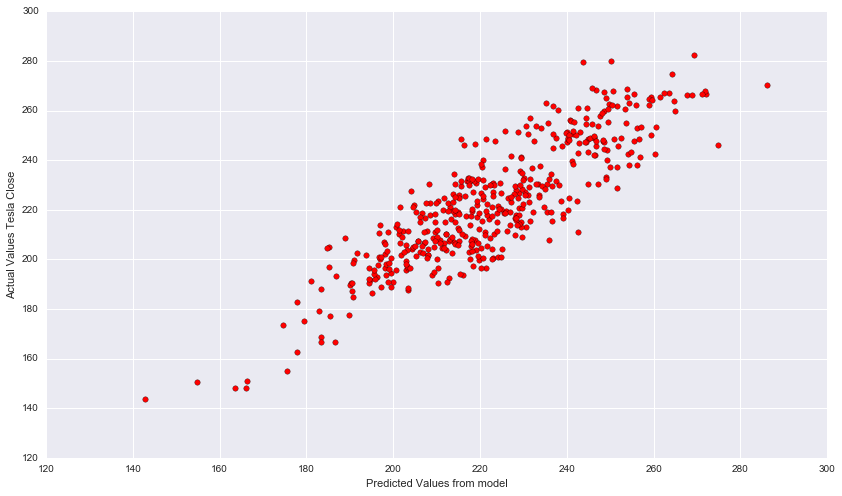

MSE: 142.293842052


In [13]:
lm = linear_model.LinearRegression()

X = features.ix[:,'GMopen':]
y = target
y_mean= np.mean(y)

model = lm.fit(X, y)
predictions = lm.predict(X)

plt.scatter(predictions, y, s=30, c='r', marker='o', zorder=10)
plt.xlabel("Predicted Values from model")
plt.ylabel("Actual Values Tesla Close")
plt.show()
print "MSE:", mean_squared_error(y, predictions)

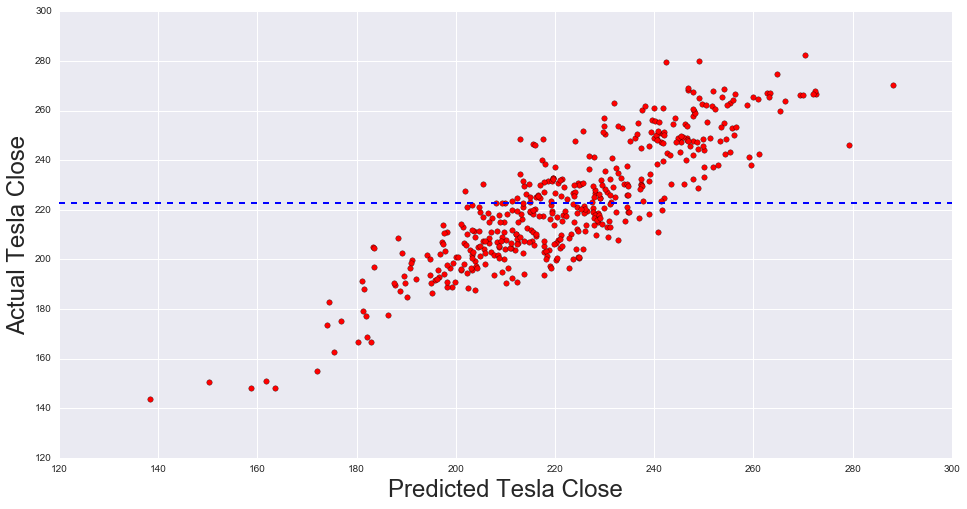

MSE: 144.673594708


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                TEclose   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     4120.
Date:                Tue, 18 Oct 2016   Prob (F-statistic):               0.00
Time:                        13:24:49   Log-Likelihood:                -1765.6
No. Observations:                 452   AIC:                             3601.
Df Residuals:                     417   BIC:                             3745.
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
GMopen        -3.6955      4.052     -0.912      0.362       -11.660     4.269
GMhigh        -0.1267      4.886     -0.026      0.979        -9.731     9.478
GMlow         -3.1059      4.941     -0.629      0.530       -12.819     6.607
GMclose        1.7839      4.384      0.407      0.684        -6.834    10.402
GMvol      -1.516e-07   1.39e-07     -1.092      0.275     -4.25e-07  1.21e-07
Fopen         -3.5706      9.524     -0.375      0.708       -22.291    15.150
Fhigh         17.2576     13.419      1.286      0.199        -9.121    43.636
Flow          -2.6101      9.915     -0.263      0.792       -22.099    16.879
Fclose        -4.4689     11.240     -0.398      0.691       -26.563    17.625
Fvol       -1.012e-07   6.27e-08     -1.614      0.107     -2.24e-07   2.2e-08
Dopen          1.0751      1.383      0.778      0.437        -1.643     3.793
Dhigh          2.9750      2.133      1.395      0.164        -1.218     7.168
Dlow          -3.7130      1.833     -2.026      0.043        -7.316    -0.110
Dclose         0.6556      2.158      0.304      0.761        -3.587     4.898
Dvol        -3.55e-05   1.88e-05     -1.886      0.060     -7.25e-05   1.5e-06
TOopen        -0.1496      2.192     -0.068      0.946        -4.458     4.159
TOhigh        -1.5248      2.627     -0.581      0.562        -6.688     3.638
TOlow          2.8966      2.475      1.170      0.243        -1.968     7.761
TOclose       -3.6712      2.663     -1.379      0.169        -8.905     1.563
TOvol      -1.438e-06   3.98e-06     -0.362      0.718     -9.25e-06  6.38e-06
Sopen          0.7275      0.964      0.754      0.451        -1.168     2.623
Shigh          0.4738      1.164      0.407      0.684        -1.814     2.762
Slow          -0.7858      1.275     -0.616      0.538        -3.293     1.721
Sclose         1.2265      1.137      1.078      0.281        -1.009     3.462
Svol       -6.751e-07   2.48e-07     -2.721      0.007     -1.16e-06 -1.87e-07
SPopen        -0.0980      0.105     -0.931      0.352        -0.305     0.109
SPhigh        -0.0400      0.203     -0.197      0.844        -0.440     0.360
SPlow          0.1261      0.206      0.611      0.542        -0.280     0.532
SPclose       -0.0604      0.255     -0.237      0.813        -0.561     0.440
SPvol      -7.468e-10   1.99e-09     -0.376      0.707     -4.65e-09  3.16e-09
NQopen         0.0487      0.047      1.030      0.304        -0.044     0.142
NQhigh         0.0336      0.078      0.430      0.667        -0.120     0.187
NQlow         -0.0551      0.079     -0.701      0.484        -0.210     0.099
NQclose        0.0941      0.093      1.011      0.313        -0.089     0.277
NQvol       5.182e-09   4.02e-09      1.288      0.199     -2.73e-09  1.31e-08
==============================================================================
Om

In [26]:
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

plt.figure(figsize=(16,8))

plt.scatter(predictions, y, s=30, c='r', marker='o')

plt.axhline(y_mean, color='b', linestyle='dashed', linewidth=2, label='Baseline')

plt.xlabel("Predicted Tesla Close", fontsize=24)

plt.ylabel("Actual Tesla Close", fontsize=24)

plt.show()

print "MSE:", mean_squared_error(y, predictions)
model.summary()

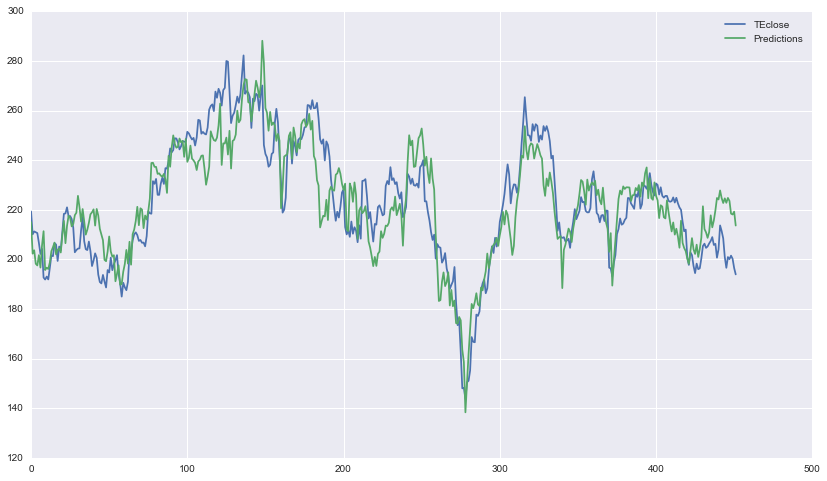

In [25]:
plt.plot(master['TEclose'], label='TEclose')
plt.plot(predictions, label='Predictions')
plt.legend()